In [29]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_5992\1644366352.py:3: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


In [30]:
train_df = train_df.dropna(axis=1, how='all')
test_df = test_df.dropna(axis=1, how='all')

for col in train_df.select_dtypes(include='object').columns:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(train_df[col].mode()[0])

for col in train_df.select_dtypes(include='number').columns:
    train_df[col] = train_df[col].fillna(train_df[col].mean())
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(train_df[col].mean())


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_5992\448761194.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
C:\Users\FreeComp\AppData\Local\Temp\ipykernel_5992\448761194.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[col] = test_df[col].fillna(train_df[col].mode()[0])


In [31]:
bool_cols = ['CryoSleep', 'VIP', 'Transported']
for col in bool_cols:
    if col in train_df.columns:
        train_df[col] = train_df[col].astype(int)
    if col in test_df.columns:
        test_df[col] = test_df[col].astype(int)


In [32]:
X_train = train_df.drop(['Transported', 'PassengerId', 'Name', 'Cabin'], axis=1)
y_train = train_df['Transported']

X_test = test_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [33]:
X_train = train_df.drop(['Transported', 'PassengerId', 'Name', 'Cabin'], axis=1)
y_train = train_df['Transported']

X_test = test_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [42]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_tr, X_val, y_tr, y_val = train_test_split(X_train_encoded, y_train, test_size=0.2, random_state=42)

model = lgb.LGBMClassifier(random_state=42)

model.fit(X_tr, y_tr)

val_preds = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print(confusion_matrix(y_val, val_preds))
print(classification_report(y_val, val_preds))


Validation Accuracy: 0.78205865439908
[[644 217]
 [162 716]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       861
           1       0.77      0.82      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [44]:
test_preds_prob = model.predict_proba(X_test_encoded)[:,1]

test_preds = test_preds_prob > 0.5

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': test_preds
})

submission.to_csv('submission.csv', index=False)
print("Saved submission.csv")


Saved submission.csv


In [38]:
test_preds_prob = model.predict_proba(X_test_encoded)[:, 1]
test_preds = (test_preds_prob > 0.5)

test_passenger_ids = pd.read_csv('test.csv')['PassengerId']

submission = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Transported": test_preds
})

submission.to_csv("submission.csv", index=False)


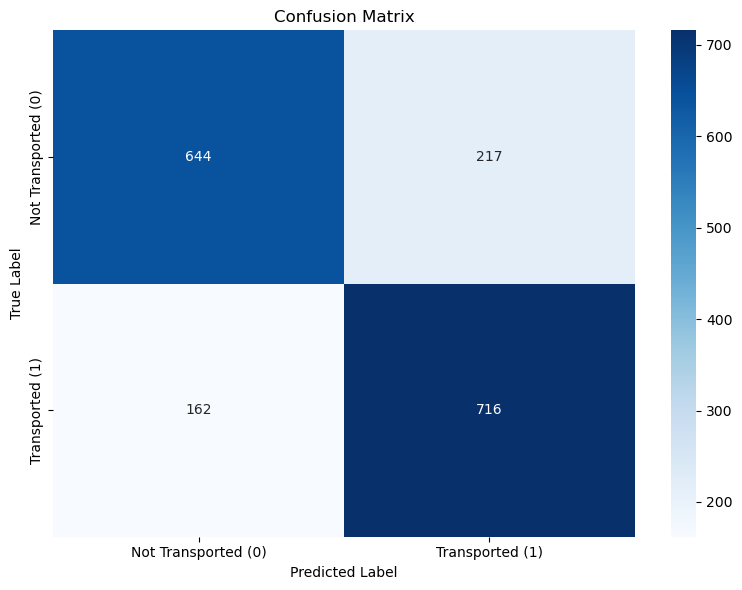

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = [[644, 217],
               [162, 716]]

labels = ['Not Transported (0)', 'Transported (1)']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
